In [1]:
import pandas as pd
from datetime import datetime
import os
from dotenv import load_dotenv, find_dotenv
import openai

In [27]:
df = pd.read_csv('./data/LLM-and-manual-cleaned-data.csv')
df.head()

,video_id,title,channel,release_date,transcript_text,word_count,OS,mouse_context,mouse
0,8cZtbjI5FnQ,My NEW Ultimate Desk Setup &amp; Office Tour 2...,UrAvgConsumer,2023-09-30 16:21:44,what's going on guys it's your average consume...,2856,Mac,NaN,Logitech MX Master 3
1,gYgaxdUAAS0,My NEW Ultimate Desk &amp; Setup Tour 2023!,Techno Tim,2023-10-21 15:00:58,What's up everyone? How's it going? So this pa...,3674,Mac,you could put all kinds of stuff in here and s...,super high DPI mouse
2,D43lCHSdrSo,The ALL-ROUNDER Desk Setup - Build &amp; Tour ...,ThisIsE,2023-10-21 13:18:22,this video is brought to you by ug green I've ...,2528,Mac,the bottom are very much like the feet on the ...,Gladius 3 Gladius Gladius
3,KwW-m69tAz8,My ultimate DREAM desk setup (2023),Patrick Rambles,2023-07-04 13:00:13,so guys ever since I've moved into this new st...,3168,Mac,most used emojis on here and I even created a ...,Logitech MX Master 3s
4,SjcvBFfMulY,My Productivity Desk Setup (2023),Ali Abdaal,2023-09-19 13:00:32,foreign welcome back to the channel and to m...,4503,Mac,really good but I'm not an audiophile I cannot...,Logitech MX Master 3s Mouse


In [28]:
# see unique mice
len(set(df.mouse.tolist()))

215

In [29]:
# many mice are same mouse but different names
mxm3 = ['Logitech MX Master 3', 'Logitech MX Master 3 Mouse','Logitech MX Master III','Logitech MX3','MX Master 3',
        'MX Master 3 Mouse', 'MX Master III','mxm 3']
mxm3s = ['Logitech MX Master 3s', 'Logitech MX Master 3s Mouse','Logitech mxm 3s','MX Master 3s','MX Master 3s Mouse','MX Masters 3s','mxm 3s']
apple_magic = ['Apple Magic Mouse','Apple magic','Apple Mouse','magic mouse','Magic Mouse','magic mouse']
trackpad = ['MacBook Air', 'MacBook Pro','magic touchpad','trackpad']
razer = ['Razer', 'razer']



In [30]:
for index, row in df.iterrows():
    if row['mouse'] in mxm3:
        df.loc[index, 'mouse'] = 'Logitech MX Master 3'
    elif row['mouse'] in mxm3s:
        df.loc[index, 'mouse'] = 'Logitech MX Master 3s'
    elif row['mouse'] in apple_magic:
        df.loc[index, 'mouse'] = 'Apple Magic Mouse'
    elif row['mouse'] in trackpad:
        df.loc[index, 'mouse'] = 'Trackpad'
    elif row['mouse'] in razer:
        df.loc[index, 'mouse'] = 'Razer'
    elif row['mouse'] == 'keyboard':
        df.loc[index, 'mouse'] = "NA"
    else:
        pass
df.mouse.value_counts()

Logitech MX Master 3     54
Logitech MX Master 3s    35
Trackpad                 28
Apple Magic Mouse        21
NA                       15
                         ..
MX Ergo                   1
Logitech Gaming mouse     1
Cal digit TS3             1
Avalanche mouse           1
G-Force                   1
Name: mouse, Length: 195, dtype: int64

<AxesSubplot:>

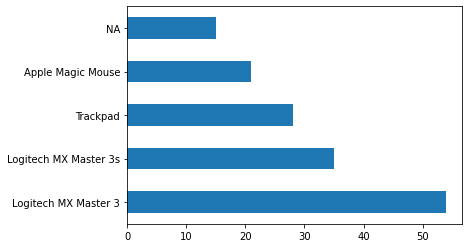

In [31]:
# plot top 5 mice
df.mouse.value_counts().head(5).plot(kind='barh')


In [32]:
# see how many logitech mice
number_of_logitech = len(df[df['mouse'].fillna('').str.contains('Logitech')])
number_of_logitech / len(df)

0.35096153846153844